In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [36]:
df=pd.read_csv("C:\\Users\\Teena Hirekerur\\Downloads\\archive (6)\\uber.csv")
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [37]:
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['pickup_datetime'].dt.dayofweek

In [38]:
df.dropna(inplace=True)

In [39]:
df = df[df['fare_amount'] <= 100]

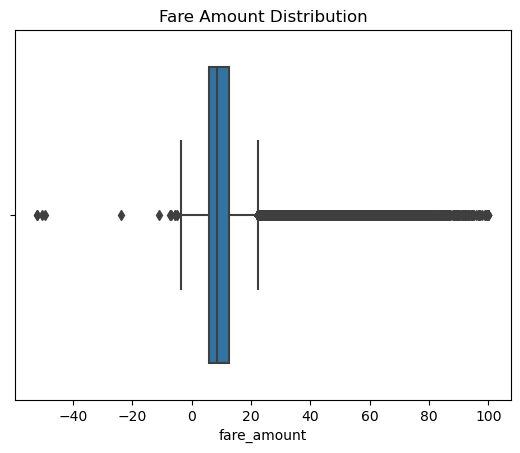

In [40]:
sns.boxplot(x=df['fare_amount'])
plt.title('Fare Amount Distribution')
plt.show()

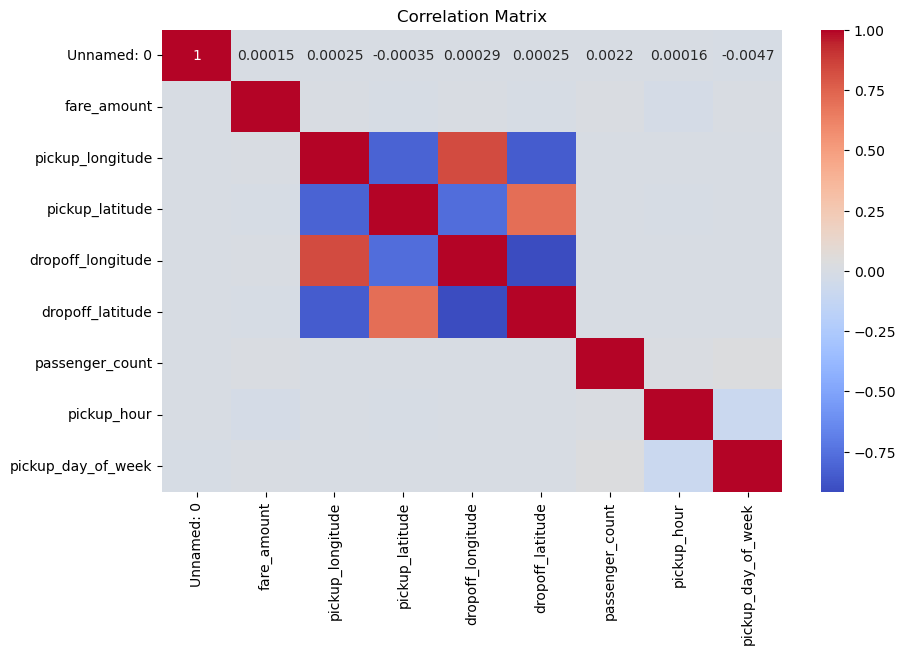

In [53]:
plt.figure(figsize=(10, 6))  # Set the figure size here
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [73]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'pickup_hour',
       'pickup_day_of_week'],
      dtype='object')

In [54]:
x = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','passenger_count', 'pickup_hour', 'pickup_day_of_week']]
y = df['fare_amount']

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [60]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
linear_pred = linear_model.predict(x_test)

In [57]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)

In [61]:
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_pred))
linear_r2 = r2_score(y_test, linear_predictions)

In [71]:
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

In [72]:
print('Linear Regression - RMSE:' ,linear_rmse, 'R^2: ',linear_r2)
print('Random Forest - RMSE: ' , rf_rmse, 'R^2: ', rf_r2)

Linear Regression - RMSE: 9.457434552927284 R^2:  0.0002826542742138116
Random Forest - RMSE:  4.186097839850542 R^2:  0.8041384046288165
